## Based on multiple features/variables perform Linear Regression. For example, based on a number of additional features like number of bedrooms, servant room, number of balconies, number of houses of years a house has been built – predict the price of a house.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ex1data2.txt", names = ['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [4]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [5]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    num_parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = X * theta.T - y
        for j in range(num_parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - (alpha / len(X)) * np.sum(term)
            theta = temp
            cost[i] = computeCost(X, y, theta)
    return theta, cost

In [6]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [7]:
cols = data.shape[1]

In [8]:
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]

X = np.matrix(X.values)
y = np.matrix(y.values)

In [9]:
theta = np.matrix(np.array([0, 0, 0]))

In [10]:
alpha = 0.01
iters = 1000

In [11]:
min_theta, cost = gradientDescent(X, y, theta, alpha, iters)

Text(0.5, 1.0, 'Iteration v/s Cost Epoch')

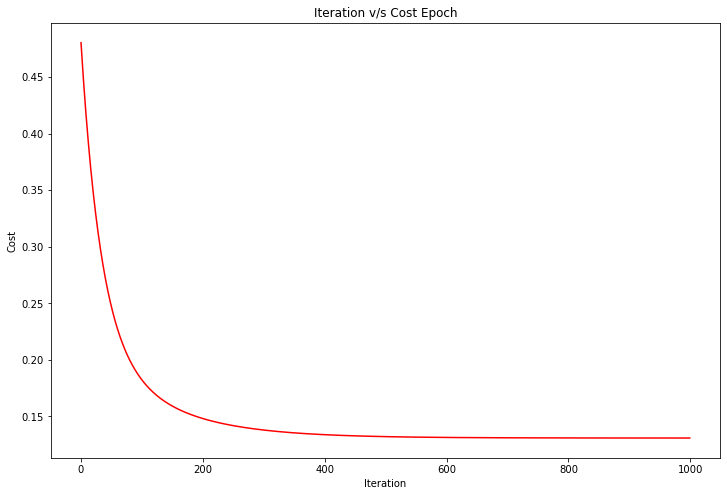

In [12]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel("Iteration")
ax.set_ylabel("Cost")
ax.set_title("Iteration v/s Cost Epoch")